In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers, models

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
csv_data = """
Date,Type,Billed Usage,Unit Of Measure
2025-10-01 12:00:00 AM,Gas,2.04,GJ
2025-09-01 12:00:00 AM,Gas,2.12,GJ
2025-08-01 12:00:00 AM,Gas,1.06,GJ
2025-07-01 12:00:00 AM,Gas,1.06,GJ
2025-06-01 12:00:00 AM,Gas,3.09,GJ
2025-05-01 12:00:00 AM,Gas,3.02,GJ
2025-04-01 12:00:00 AM,Gas,8.14,GJ
2025-03-01 12:00:00 AM,Gas,7.14,GJ
2025-02-01 12:00:00 AM,Gas,18.28,GJ
2025-01-01 12:00:00 AM,Gas,14.36,GJ
2024-12-01 12:00:00 AM,Gas,13.19,GJ
2024-11-01 12:00:00 AM,Gas,7.01,GJ

2025-10-01 12:00:00 AM,Power,479,KWh
2025-09-01 12:00:00 AM,Power,407,KWh
2025-08-01 12:00:00 AM,Power,465,KWh
2025-07-01 12:00:00 AM,Power,391,KWh
2025-06-01 12:00:00 AM,Power,469,KWh
2025-05-01 12:00:00 AM,Power,420,KWh
2025-04-01 12:00:00 AM,Power,346,KWh
2025-03-01 12:00:00 AM,Power,501,KWh
2025-02-01 12:00:00 AM,Power,666,KWh
2025-01-01 12:00:00 AM,Power,643,KWh
2024-12-01 12:00:00 AM,Power,575,KWh
2024-11-01 12:00:00 AM,Power,500,KWh

2025-10-01 12:00:00 AM,Water,17.483,m3
2025-09-01 12:00:00 AM,Water,16.544,m3
2025-08-01 12:00:00 AM,Water,17.609,m3
2025-07-01 12:00:00 AM,Water,15.026,m3
2025-06-01 12:00:00 AM,Water,20.449,m3
2025-05-01 12:00:00 AM,Water,16.374,m3
2025-04-01 12:00:00 AM,Water,9.434,m3
2025-03-01 12:00:00 AM,Water,18.631,m3
2025-02-01 12:00:00 AM,Water,17.234,m3
2025-01-01 12:00:00 AM,Water,19.5,m3
2024-12-01 12:00:00 AM,Water,17.5,m3
2024-11-01 12:00:00 AM,Water,16.7,m3
"""

# Read CSV
from io import StringIO
df = pd.read_csv(StringIO(csv_data))
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)
df.head()


In [ ]:
def prepare_data(df, utility_type):
    d = df[df["Type"]==utility_type].copy().reset_index(drop=True)
    d["MonthIndex"] = np.arange(len(d))
    d = d.rename(columns={"Billed Usage":"Usage"})
    return d[["MonthIndex","Usage"]]

gas = prepare_data(df, "Gas")
power = prepare_data(df, "Power")
water = prepare_data(df, "Water")


Gas - Linear Regression next month: -1.26


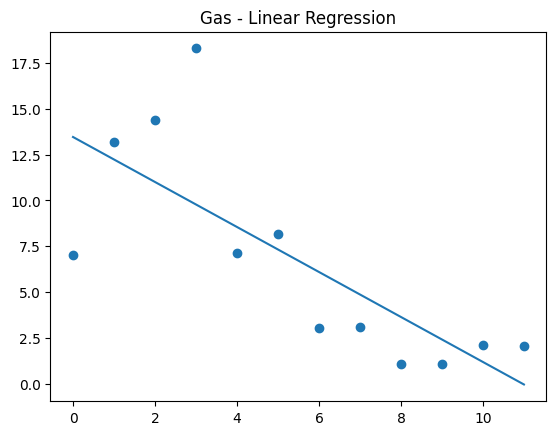

Power - Linear Regression next month: 388.82


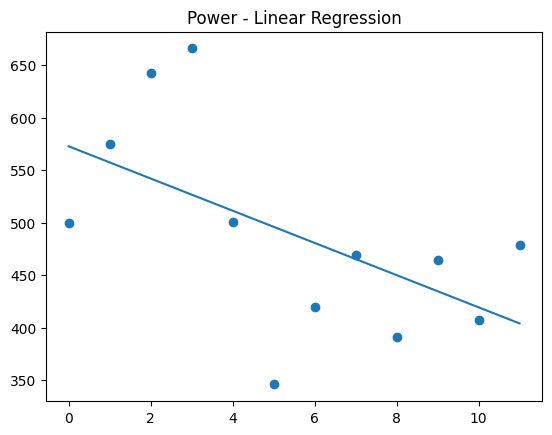

Water - Linear Regression next month: 16.60


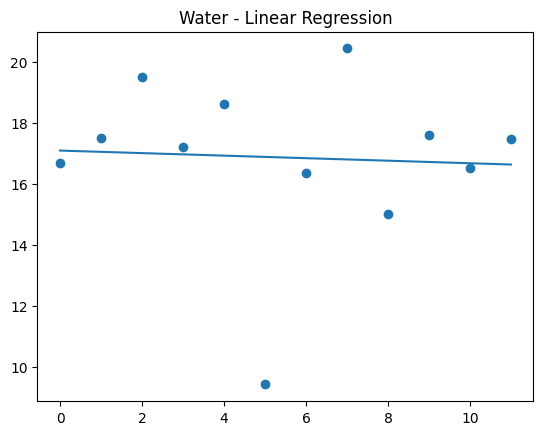

In [ ]:
def run_simple_model(data, label):
    X = data[["MonthIndex"]].values
    y = data["Usage"].values

    model = LinearRegression()
    model.fit(X, y)

    # Predict next month
    next_month = np.array([[len(X)]])
    prediction = model.predict(next_month)[0]

    print(f"{label} - Linear Regression next month: {prediction:.2f}")

    # Plot
    plt.scatter(X, y)
    plt.plot(X, model.predict(X))
    plt.title(f"{label} - Linear Regression")
    plt.show()

run_simple_model(gas, "Gas")
run_simple_model(power, "Power")
run_simple_model(water, "Water")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Gas - TensorFlow NN next month: 6.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


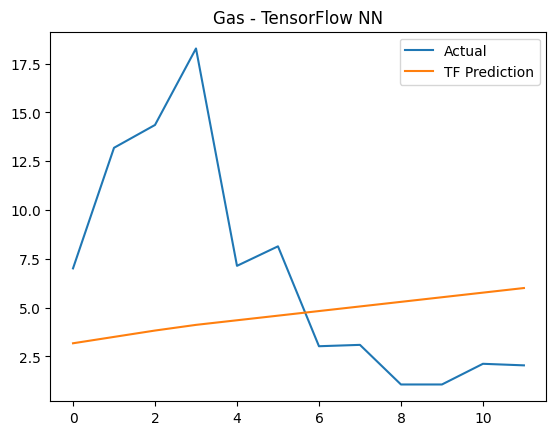

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Power - TensorFlow NN next month: 9.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


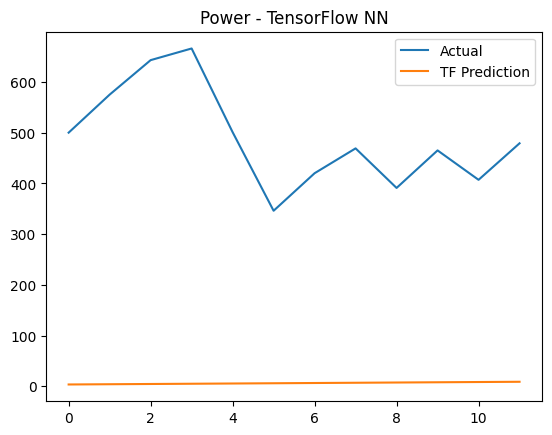

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Water - TensorFlow NN next month: 3.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


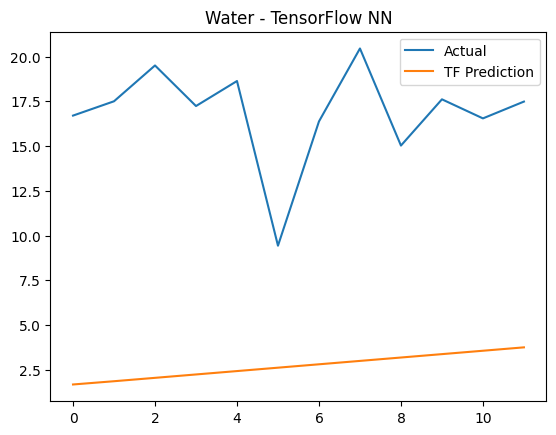

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def run_tf_model(data, label):
    X = data[["MonthIndex"]].values.astype("float32")
    y = data["Usage"].values.astype("float32")

    scaler = MinMaxScaler()
    Xs = scaler.fit_transform(X)

    model = models.Sequential([
        layers.Dense(16, activation="relu", input_shape=(1,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(Xs, y, epochs=200, verbose=0)

    # Predict next month
    next_month = scaler.transform([[len(X)]])
    pred = model.predict(next_month)[0][0]
    print(f"{label} - TensorFlow NN next month: {pred:.2f}")

    # Plot predictions
    y_pred = model.predict(Xs).flatten()
    plt.plot(X, y, label="Actual")
    plt.plot(X, y_pred, label="TF Prediction")
    plt.legend(); plt.title(f"{label} - TensorFlow NN"); plt.show()

run_tf_model(gas, "Gas")
run_tf_model(power, "Power")
run_tf_model(water, "Water")